<pre>
/*  Copyright (c) 2020 Ming Liu <Mliu54@sheffield.ac.uk>
 *
 *  Licensed under the Apache License, Version 2.0 (the "License");
 *  you may not use this file except in compliance with the License.
 *  You may obtain a copy of the License at
 *
 *      http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */
</pre>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

random_seed = 123

initial_file = '34676-M57-0302_Iss7-loc_text-without-res.csv'
result_file = '34676-M57-0302_Iss7-loc_text_with_specified_centres.csv'

In [2]:
# read data
text_coors = pd.read_csv(initial_file)

# depends on the number of rooms in PDF file
num_classes = 14

In [3]:
text_coors.head()

,x,y,text,type
0,-12.652222,991.52000,BREAKOUT ROOM 3.5,ROOM
1,149.385010,672.68005,E/D.29,SENSOR
2,-9.466431,1751.54000,SILENT STUDY SPACE 1_30 Workplaces,ROOM
3,215.834350,1630.88000,E/E.26,SENSOR
4,107.133910,1736.48000,SUF-03,SENSOR


In [4]:
# adquire (x,y) coordinates
features = text_coors.iloc[:,[0,1]].to_numpy()

In [5]:
# adquire initial centres
init_centres = text_coors.loc[text_coors['type'] == 'ROOM'].iloc[:,[0,1]].to_numpy()

In [6]:
init_centres

array([[ -12.652222,  991.52    ],
       [  -9.466431, 1751.54    ],
       [ 238.38782 , 1032.8     ],
       [ 532.8678  , 1023.44    ],
       [ 810.42786 , 1050.9199  ],
       [1095.9375  ,  960.56    ],
       [1106.484   , 1090.76    ],
       [1301.6747  , 1090.4     ],
       [1321.0547  ,  629.84    ],
       [1453.1646  ,  764.18005 ],
       [1471.7781  , 1081.52    ],
       [1476.8839  , 1316.1201  ],
       [1631.8174  , 2253.74    ],
       [1893.4939  , 1120.28    ]])

In [7]:
kmeans = KMeans(num_classes, random_state=random_seed, max_iter=50, algorithm='full',
                n_init=1, init=init_centres)
clusters = kmeans.fit_predict(features)

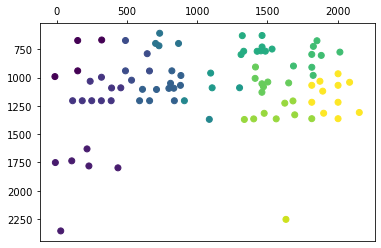

In [8]:
# plot results and reset (0,0) to top left corner
plt.scatter(features[:, 0], features[:, 1], c=clusters)
ax = plt.gca()                  
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()                 
plt.show()

In [9]:
# add result of clustering
text_coors['group']=clusters

In [10]:
# sort by group id and type
text_coors = text_coors.sort_values(by=['group','type'],axis=0,ascending=[True,True]) 

In [11]:
text_coors.head()

,x,y,text,type,group
0,-12.652222,991.52000,BREAKOUT ROOM 3.5,ROOM,0
1,149.385010,672.68005,E/D.29,SENSOR,0
9,320.263800,668.12000,S/D.29/01,SENSOR,0
10,149.385010,940.76000,E/D.29,SENSOR,0
2,-9.466431,1751.54000,SILENT STUDY SPACE 1_30 Workplaces,ROOM,1


In [12]:
# rewrite to file
text_coors.to_csv(result_file, index=False)